In [53]:
import pymc as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import causalpy as cp


import arviz as az
import bambi as bmb
import pandas as pd

import seaborn as sns
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
print(f"Running on PyMC v{pm.__version__}")



Running on PyMC v5.9.0


In [55]:
df = pd.read_csv("/Users/sofiepelvig/apartments/assets/data/bolig.csv.gzip", compression="gzip", parse_dates=["soldDate"])


In [56]:
#Sorting fam_salg away
alm_salg_df = df[df['saleType'] == 'Alm. Salg']

#Sorting apartments away that where sold for under 500.000 and above 9.000.000
alm_salg_df = alm_salg_df[(alm_salg_df['price'] > 5e5) & (alm_salg_df['price'] < 9e6)]

#Sorting apartments away that have above 5 roomes doe to the likelyhood of it being under 0.001%procent
alm_salg_df = alm_salg_df[(alm_salg_df['rooms'] < 6 )]

In [73]:
# Select only 'price' and 'size' columns
df = alm_salg_df[['price', 'size','rooms']]

# Remove rows with missing or zero values
df = df[(df['price'] != 0) & (df['size'] != 0) & (df['rooms'] != 0)].dropna()

# Log transform the columns
#df['price'] = np.log10(df['price'])  # Base 10 logarithm
#df['size'] = np.log10(df['size'])    # Base 10 logarithm

# Split the data
X, y, z = df[['size']], df[['price']], df[['rooms']]
X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(X, y, z, train_size=0.8)

# Display the first few rows of the new DataFrame
df.head()



,price,size,rooms
0,5400000,98,4.0
1,4195000,80,3.0
2,3475000,61,2.0
4,3744000,107,4.0
6,3150000,71,2.0


In [74]:
import warnings

warnings.filterwarnings("ignore")

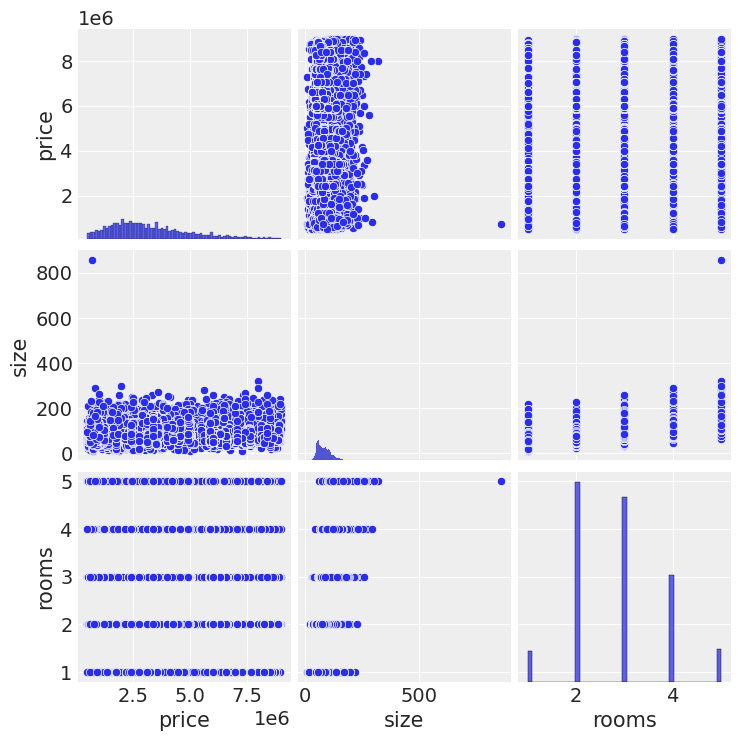

In [75]:
# pairplot
_ = sns.pairplot(data = df)

In [76]:
data = X_train.assign(price =  y_train, rooms = z_train)

In [80]:
model = bmb.Model('price ~ size + (size|rooms)', data)

In [81]:
model

       Formula: price ~ size + (size|rooms)
        Family: gaussian
          Link: mu = identity
  Observations: 54483
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 3301087.4198, sigma: 13124694.6566)
            size ~ Normal(mu: 0.0, sigma: 146882.1745)
        
        Group-level effects
            1|rooms ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 13124694.6566))
            size|rooms ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 146882.1745))
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 1792816.7551)

In [82]:
results = model.fit(draws=1000, chains=4)

ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: DropDims{axis=0}([5])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/Users/sofiepelvig/apartments/.pixi/env/lib/python3.10/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/Users/sofiepelvig/apartments/.pixi/env/lib/python3.10/site-packages/pytensor/graph/rewriting/basic.py", line 1082, in transform
    return self.fn(fgraph, node)
  File "/Users/sofiepelvig/apartments/.pixi/env/lib/python3.10/site-packages/pytensor/tensor/rewriting/basic.py", line 1106, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/Users/sofiepelvig/apartments/.pixi/env/lib/python3.10/site-packages/pytensor/link/c/op.py", line 131, in make_thunk
    retu

KeyboardInterrupt: 